In [1]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("Hipertension_Arterial_Mexico.csv")

# Vista general del dataset
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
display(df.head())

# Tipos de datos
print("\nTipos de variables:")
display(df.dtypes)

# Verificar valores únicos por columna
print("\nValores únicos por variable:")
display(df.nunique())

# Verificar valores faltantes
print("\nValores nulos por variable:")
display(df.isnull().sum())

Dimensiones del dataset: (4363, 36)

Primeras filas:


,FOLIO_I,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
0,2022_01001004,2,41,14.2,22,4.8,4.0,34,86.0,139,...,64.70,154.0,48.5,33.5,0.0,107,4,32.889389,120,1
1,2022_01001009,2,65,14.1,9,4.4,3.8,73,130.0,252,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,0
2,2022_01001012,2,68,14.2,22,4.8,4.0,34,86.0,139,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,0
3,2022_01001013,1,35,15.7,11,6.5,4.1,49,107.0,203,...,64.70,154.0,48.5,33.5,0.0,117,5,26.265339,275,1
4,2022_01001015,2,65,12.7,7,4.2,4.2,41,76.0,145,...,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255,0



Tipos de variables:


FOLIO_I                              object
sexo                                  int64
edad                                  int64
concentracion_hemoglobina           float64
temperatura_ambiente                  int64
valor_acido_urico                   float64
valor_albumina                      float64
valor_colesterol_hdl                  int64
valor_colesterol_ldl                float64
valor_colesterol_total                int64
valor_creatina                      float64
resultado_glucosa                   float64
valor_insulina                      float64
valor_trigliceridos                   int64
resultado_glucosa_promedio            int64
valor_hemoglobina_glucosilada       float64
valor_ferritina                     float64
valor_folato                        float64
valor_homocisteina                  float64
valor_proteinac_reactiva            float64
valor_transferrina                  float64
valor_vitamina_bdoce                float64
valor_vitamina_d                


Valores únicos por variable:


FOLIO_I                             4363
sexo                                   2
edad                                  83
concentracion_hemoglobina            116
temperatura_ambiente                  33
valor_acido_urico                     85
valor_albumina                        41
valor_colesterol_hdl                  74
valor_colesterol_ldl                 158
valor_colesterol_total               215
valor_creatina                       116
resultado_glucosa                    210
valor_insulina                       332
valor_trigliceridos                  344
resultado_glucosa_promedio            94
valor_hemoglobina_glucosilada         93
valor_ferritina                      408
valor_folato                         224
valor_homocisteina                   343
valor_proteinac_reactiva             149
valor_transferrina                    42
valor_vitamina_bdoce                 327
valor_vitamina_d                     249
peso                                1222
estatura        


Valores nulos por variable:


FOLIO_I                             0
sexo                                0
edad                                0
concentracion_hemoglobina           0
temperatura_ambiente                0
valor_acido_urico                   0
valor_albumina                      0
valor_colesterol_hdl                0
valor_colesterol_ldl                0
valor_colesterol_total              0
valor_creatina                      0
resultado_glucosa                   0
valor_insulina                      0
valor_trigliceridos                 0
resultado_glucosa_promedio          0
valor_hemoglobina_glucosilada       0
valor_ferritina                     0
valor_folato                        0
valor_homocisteina                  0
valor_proteinac_reactiva            0
valor_transferrina                  0
valor_vitamina_bdoce                0
valor_vitamina_d                    0
peso                                0
estatura                            0
medida_cintura                      0
segundamedic

In [2]:
def detectar_codigos_sospechosos(df, codigos=[88, 99, 55, 77]):
    codigos_encontrados = {}
    
    for col in df.select_dtypes(include=["number"]).columns:
        valores_unicos = df[col].unique()
        encontrados = [v for v in codigos if v in valores_unicos]
        if encontrados:
            codigos_encontrados[col] = encontrados
            
    return codigos_encontrados

# Ejecutar función sobre el dataset
codigos_detectados = detectar_codigos_sospechosos(df)
print("Variables con códigos sospechosos detectados:")
for var, codigos in codigos_detectados.items():
    print(f"- {var}: {codigos}")

Variables con códigos sospechosos detectados:
- edad: [88, 55, 77]
- valor_colesterol_hdl: [88, 55, 77]
- valor_colesterol_ldl: [88, 99, 55, 77]
- valor_colesterol_total: [88, 99, 77]
- resultado_glucosa: [88, 99, 55, 77]
- valor_trigliceridos: [88, 99, 55, 77]
- resultado_glucosa_promedio: [88, 77]
- valor_vitamina_bdoce: [88, 99]
- peso: [88, 99, 55, 77]
- medida_cintura: [88, 99, 77]
- segundamedicion_peso: [88, 99, 55, 77]
- distancia_rodilla_talon: [55]
- segundamedicion_cintura: [88, 99]
- tension_arterial: [88, 99]
- sueno_horas: [99]


In [3]:
import numpy as np
import pandas as pd

def revisar_valores_atipicos(df, percentil_inferior=0.01, percentil_superior=0.99, umbral_frecuencia=0.05):
    resumen = []

    for col in df.select_dtypes(include=[np.number]).columns:
        valores_unicos = df[col].value_counts(normalize=True)
        cuantil_bajo = df[col].quantile(percentil_inferior)
        cuantil_alto = df[col].quantile(percentil_superior)
        
        valores_fuera_de_rango = valores_unicos[(valores_unicos.index < cuantil_bajo) | (valores_unicos.index > cuantil_alto)]
        valores_muy_frecuentes = valores_unicos[valores_unicos > umbral_frecuencia]

        if not valores_fuera_de_rango.empty or not valores_muy_frecuentes.empty:
            resumen.append({
                "variable": col,
                "rango_esperado": (round(cuantil_bajo, 2), round(cuantil_alto, 2)),
                "valores_fuera_de_rango": valores_fuera_de_rango.index.tolist(),
                "valores_muy_frecuentes": valores_muy_frecuentes.index.tolist()
            })

    resultado = pd.DataFrame(resumen)

    if not resultado.empty:
        print("Resumen de valores atípicos y frecuentes detectados:")
        return resultado
    else:
        print("No se detectaron valores atípicos ni valores sospechosamente frecuentes.")
        return pd.DataFrame()
resumen = revisar_valores_atipicos(df)
resumen  # <- Esto lo muestra automáticamente en Jupyter

Resumen de valores atípicos y frecuentes detectados:


,variable,rango_esperado,valores_fuera_de_rango,valores_muy_frecuentes
0,sexo,"(1.0, 2.0)",[],"[2, 1]"
1,edad,"(18.0, 78.0)","[16, 17, 15, 79, 80, 81, 82, 84, 85, 83, 9, 88...",[]
2,concentracion_hemoglobina,"(10.36, 17.9)","[18.0, 18.7, 18.4, 10.2, 18.1, 10.3, 18.3, 9.3...",[14.2]
3,temperatura_ambiente,"(9.0, 29.0)","[8, 31, 7, 33, 32, 30, 6, 5, 35, 3, 4, 2]",[22]
4,valor_acido_urico,"(2.46, 7.8)","[8.0, 2.3, 2.4, 2.2, 1.9, 8.4, 7.9, 1.8, 2.0, ...",[4.8]
5,valor_albumina,"(2.0, 4.7)","[1.9, 4.8, 1.5, 1.7, 1.6, 5.0, 4.9, 1.8, 5.1, ...",[4.0]
6,valor_colesterol_hdl,"(22.0, 64.0)","[21, 66, 17, 18, 65, 19, 15, 70, 20, 16, 75, 7...",[34]
7,valor_colesterol_ldl,"(42.0, 152.0)","[40.0, 38.0, 41.0, 37.0, 153.0, 28.0, 35.0, 15...",[86.0]
8,valor_colesterol_total,"(77.0, 242.0)","[70, 249, 72, 67, 76, 246, 279, 66, 59, 73, 27...",[139]
9,valor_creatina,"(0.35, 1.05)","[0.33, 0.32, 1.1, 0.34, 0.22, 0.29, 1.25, 1.2,...",[0.58]


In [4]:
# Crear columnas corregidas
df["peso_corregido"] = df["peso"]
df["estatura_corregida"] = df["estatura"]

# Reemplazar valores bajos por segundas mediciones cuando sea necesario
df.loc[df["peso_corregido"] < 30, "peso_corregido"] = df["segundamedicion_peso"]
df.loc[df["estatura_corregida"] < 100, "estatura_corregida"] = df["segundamedicion_estatura"]

# Calcular un IMC corregido basado en los nuevos valores
df["imc"] = df["peso_corregido"] / ((df["estatura_corregida"] / 100) ** 2)

# Eliminar registros con IMC < 9
df = df[df["imc"] >= 9].copy()

# Eliminar columnas innecesarias si deseas limpiar
df = df.drop(columns=[
    "segundamedicion_peso", "segundamedicion_estatura", "masa_corporal", "estatura", "peso"
], errors='ignore')

In [5]:
# Calcular la media de 'sueno_horas' excluyendo el valor 99
media_sueno = df.loc[df["sueno_horas"] != 99, "sueno_horas"].mean()

# Redondear al entero más cercano
media_sueno_entero = int(round(media_sueno))

# Reemplazar los valores 99 por la media redondeada
df["sueno_horas"] = df["sueno_horas"].replace(99, media_sueno_entero)

In [6]:
# Reemplazar valores 0 en medida_cintura con segundamedicion_cintura cuando sea válida
df.loc[
    (df["medida_cintura"] == 0) &
    (df["segundamedicion_cintura"].notna()) &
    (df["segundamedicion_cintura"] > 0),
    "medida_cintura"
] = df["segundamedicion_cintura"]
# Eliminar columnas innecesarias si deseas limpiar
df = df.drop(columns=[
    "segundamedicion_cintura"
], errors='ignore')

# Calcular la media de los valores válidos
media_cintura = df["medida_cintura"].loc[df["medida_cintura"] > 0].mean()

# Reemplazar valores 0 por la media
df["medida_cintura"] = df["medida_cintura"].replace(0, media_cintura)

In [7]:
#df["medida_cintura"].describe()

In [8]:
# Calcular la media excluyendo valores codificados
media_tension = df.loc[~df["tension_arterial"].isin([0]), "tension_arterial"].mean()

# Reemplazar los valores 0 con la media
df["tension_arterial"] = df["tension_arterial"].replace(0, media_tension)


In [9]:
# Reemplazar valores 0.0 y > 45 por la media válida
media_pantorrilla = df["circunferencia_de_la_pantorrilla"].loc[
    (df["circunferencia_de_la_pantorrilla"] > 0) & 
    (df["circunferencia_de_la_pantorrilla"] <= 45)
].mean()

df.loc[df["circunferencia_de_la_pantorrilla"] == 0.0, "circunferencia_de_la_pantorrilla"] = media_pantorrilla
df.loc[df["circunferencia_de_la_pantorrilla"] > 45, "circunferencia_de_la_pantorrilla"] = media_pantorrilla

In [10]:
# Calcular la media con valores válidos
media_rodilla_talon = df["distancia_rodilla_talon"].loc[
    (df["distancia_rodilla_talon"] >= 35) & 
    (df["distancia_rodilla_talon"] <= 65)
].mean()

# Reemplazar valores 0.0 y > 65 por la media
df.loc[df["distancia_rodilla_talon"] == 0.0, "distancia_rodilla_talon"] = media_rodilla_talon
df.loc[df["distancia_rodilla_talon"] > 65, "distancia_rodilla_talon"] = media_rodilla_talon

In [11]:
# Reemplazar valores de vitamina D < 10 por la mediana (20.8 ng/mL)
df.loc[df["valor_vitamina_d"] < 10, "valor_vitamina_d"] = 20.8

In [12]:
# Corrección de valores fuera de rango en vitaminas

# 1. Vitamina B12 (rango 200–900 pg/mL)
b12_median = df.loc[
    (df["valor_vitamina_bdoce"] >= 200) & (df["valor_vitamina_bdoce"] <= 900),
    "valor_vitamina_bdoce"
].median()
df.loc[df["valor_vitamina_bdoce"] < 200, "valor_vitamina_bdoce"] = b12_median
df.loc[df["valor_vitamina_bdoce"] > 900, "valor_vitamina_bdoce"] = b12_median

# 2. Folato (rango 4–20 ng/mL)
folato_media_valida = df.loc[
    (df["valor_folato"] >= 4) & (df["valor_folato"] <= 20),
    "valor_folato"
].mean()
df.loc[df["valor_folato"] > 20, "valor_folato"] = folato_media_valida

# 3. Homocisteína (rango 5–15 µmol/L)
homo_media_valida = df.loc[
    (df["valor_homocisteina"] >= 5) & (df["valor_homocisteina"] <= 15),
    "valor_homocisteina"
].mean()
df.loc[df["valor_homocisteina"] < 5, "valor_homocisteina"] = homo_media_valida
df.loc[df["valor_homocisteina"] > 15, "valor_homocisteina"] = homo_media_valida

,Importancia
imc,0.218424
actividad_total,0.127462
tension_arterial,0.111334
edad,0.110051
peso_corregido,0.076801
distancia_rodilla_talon,0.075829
circunferencia_de_la_pantorrilla,0.074400
estatura_corregida,0.049977
medida_cintura,0.041643
FOLIO_I,0.012100


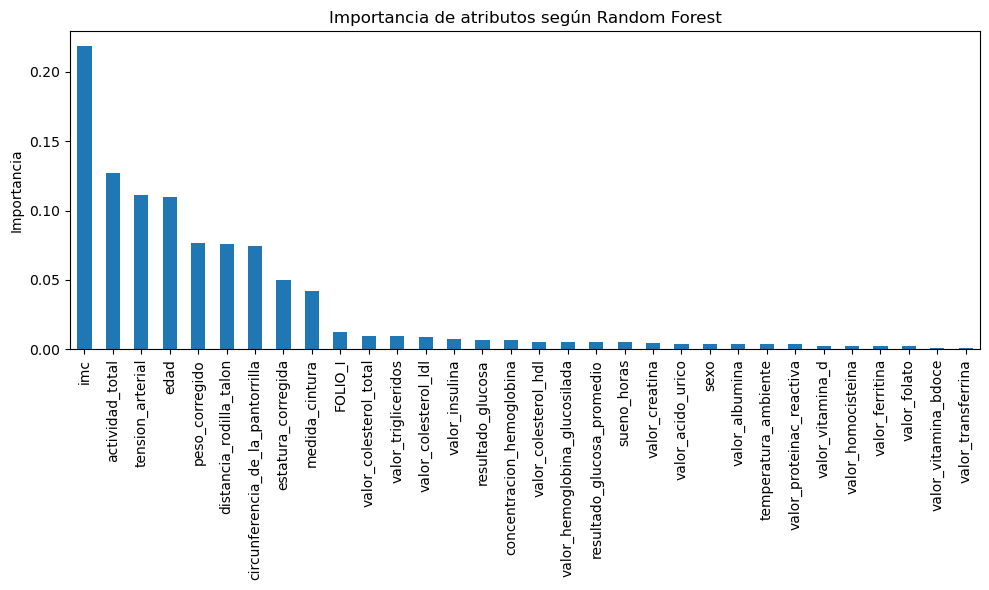

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd

# Crear copia de trabajo
df_model = df.copy()

# Separar características y variable objetivo
X = df_model.drop(columns=['riesgo_hipertension'])
y = df_model['riesgo_hipertension']

# Codificar cualquier columna categórica si existe
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Imputar valores faltantes con la mediana
X = X.fillna(X.median(numeric_only=True))

# División de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento del modelo
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Importancia de atributos
importancias = pd.Series(modelo_rf.feature_importances_, index=X.columns)
importancias = importancias.sort_values(ascending=False)

# Mostrar la tabla
display(importancias.to_frame("Importancia"))

# Mostrar gráfico
plt.figure(figsize=(10,6))
importancias.plot(kind='bar')
plt.title("Importancia de atributos según Random Forest")
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()

import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Separar el identificador y la variable objetivo
X_base = X.drop(columns=["FOLIO_I", "riesgo_hipertension"])
folio_col = X["FOLIO_I"]
y = X["riesgo_hipertension"]

# Aplicar ANOVA F-score solo a variables explicativas numéricas
selector = SelectKBest(score_func=f_classif, k='all')
X_fscore = selector.fit_transform(X_base, y)

# Crear DataFrame con resultados de F-score y p-values
fscore_df = pd.DataFrame({
    'variable': X_base.columns,
    'f_score': selector.scores_,
    'p_value': selector.pvalues_
}).sort_values(by='f_score', ascending=False)

# Filtrar las variables con p < 0.05
top_variables = fscore_df[fscore_df['p_value'] < 0.05]
variables_seleccionadas = top_variables['variable'].tolist()

# Construir nuevo DataFrame con variables seleccionadas + FOLIO_I
X_seleccionado = X[variables_seleccionadas + ["FOLIO_I"]]

# Verificar que los índices coincidan antes de agregar la variable objetivo
assert all(X_seleccionado.index == y.index), "¡Error! El índice de y no coincide con X_seleccionado."

# Añadir la variable objetivo
X_seleccionado["riesgo_hipertension"] = y

# Guardar el nuevo conjunto de datos en CSV
X_seleccionado.to_csv("variables_seleccionadas.csv", index=False)

# Mostrar resultados
display(fscore_df)
print("\nVariables seleccionadas (p < 0.05):")
display(top_variables)


In [ ]:
#df.to_csv("Hipertension_Arterial_Mexico_limpio.csv", index=False)
#print("Archivo guardado como 'Hipertension_Arterial_Mexico_limpio.csv'")

In [17]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Separar variable objetivo y predictor
y = df["riesgo_hipertension"]
X = df.drop(columns=["riesgo_hipertension"])

# Separar identificador
X_base = X.drop(columns=["FOLIO_I"])
folio_col = X["FOLIO_I"]

# Aplicar ANOVA F-score
selector = SelectKBest(score_func=f_classif, k='all')
X_fscore = selector.fit_transform(X_base, y)

# Crear DataFrame con F-scores y p-values
fscore_df = pd.DataFrame({
    'variable': X_base.columns,
    'f_score': selector.scores_,
    'p_value': selector.pvalues_
}).sort_values(by='f_score', ascending=False)

# Seleccionar variables con p < 0.05
top_variables = fscore_df[fscore_df['p_value'] < 0.05]
variables_seleccionadas = top_variables['variable'].tolist()

# Construir nuevo DataFrame
X_seleccionado = X[variables_seleccionadas + ["FOLIO_I"]]

# Añadir variable objetivo
X_seleccionado["riesgo_hipertension"] = y

# Guardar en CSV
X_seleccionado.to_csv("variables_seleccionadas.csv", index=False)

# Mostrar resultados
display(fscore_df)
print("\nVariables seleccionadas (p < 0.05):")
display(top_variables)


/var/folders/sg/z4g4lsbn7xld0pcvpvnnk4n40000gn/T/ipykernel_42275/465279608.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_seleccionado["riesgo_hipertension"] = y


,variable,f_score,p_value
28,peso_corregido,596.380854,1.483968e-123
30,imc,329.000277,6.112413e-71
22,medida_cintura,272.863086,1.683590e-59
24,circunferencia_de_la_pantorrilla,224.583653,1.525256e-49
1,edad,209.411154,2.167561e-46
29,estatura_corregida,141.583156,3.759539e-32
12,valor_trigliceridos,52.944681,4.048702e-13
7,valor_colesterol_ldl,36.675976,1.512464e-09
27,actividad_total,30.113907,4.305283e-08
11,valor_insulina,29.939667,4.707140e-08



Variables seleccionadas (p < 0.05):


,variable,f_score,p_value
28,peso_corregido,596.380854,1.483968e-123
30,imc,329.000277,6.112413e-71
22,medida_cintura,272.863086,1.683590e-59
24,circunferencia_de_la_pantorrilla,224.583653,1.525256e-49
1,edad,209.411154,2.167561e-46
29,estatura_corregida,141.583156,3.759539e-32
12,valor_trigliceridos,52.944681,4.048702e-13
7,valor_colesterol_ldl,36.675976,1.512464e-09
27,actividad_total,30.113907,4.305283e-08
11,valor_insulina,29.939667,4.707140e-08
